In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw02.ok')

Assignment: hw02
OK, version v1.12.5



In [2]:
!pip install --upgrade networkx

  Using cached https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl
  Found existing installation: decorator 4.1.2
    Uninstalling decorator-4.1.2:
      Successfully uninstalled decorator-4.1.2
  Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11


In [3]:
!pip install jassign

  Using cached https://files.pythonhosted.org/packages/74/e2/b0c116e0644b61721d89dcbfae0bb1042d92391e4f780987eb6f53ffe3da/jassign-0.0.7-py3-none-any.whl


In [4]:
!pip install tqdm

In [5]:
from IPython.core.display import HTML
from datascience import *
import itertools
import matplotlib
import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx
%matplotlib inline

#np.random.seed(99)

# HW 03

In this HW, we are going to calculate the average clustering coefficient of a network based on the concepts we have discussed in the lectures and labs.
Starting from a small hand-crafted network, we are eventually going to analyze a complete network data from the [Add Health project](http://www.cpc.unc.edu/projects/addhealth).

## Clustering Coefficient

**Clustering Coefficient** of a node can be defined as the fraction of the number of pairs of neighbors of a node that are directly connected to each other.

Consider the network created by the following code.

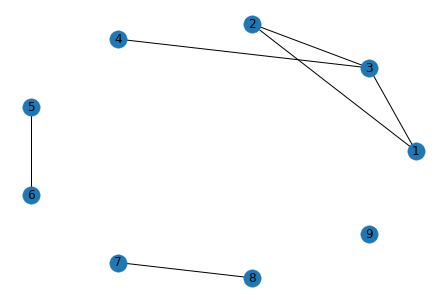

In [40]:
ex_network = nx.Graph([(1,3), (2,3), (1,2), (3,4), (5,6), (7,8)])
ex_network.add_node(9)
nx.draw_circular(ex_network, with_labels=True)

### 1) Calculating average clustering coefficient by hand

**Practice** For each node in the above graph, calculate the following things:

* Degree of the node, 
* Number of pairs of neighbors of the node,
* Number of the pairs of neighbors that are directly connected with each other

Write down your answer as a table with the following columns:

NodeId, Degree of the node, Number of pairs of neighbors, Number of the pairs of the neighbors that are directly connected

* Write down this table as comma seperated and begin each line with a #

In [7]:
# NodeId, Degree of the node, Number of pairs of neighbors, Number of the pairs of the neighbors that are directly connected
# 1,2,1,1
# 2,2,1,1
# 3,3,3,1
# 4,1,0,0
# 5,1,0,0
# 6,1,0,0
# 7,1,0,0
# 8,1,0,0
# 9,0,0,0

In [8]:
print(nx.degree(ex_network))

[(1, 2), (3, 3), (2, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 0)]


In [9]:
ans = Table().with_columns(['NodeId', np.arange(1, 10, 1),
                            'Degree of the node', [2,2,3,1,1,1,1,1,0],
                            'Number of pairs of neighbors', [1,1,3,0,0,0,0,0,0],
                            'Number of the pairs of the neighbors that are directly connected', [1,1,1,0,0,0,0,0,0]
                        ])
ans

NodeId,Degree of the node,Number of pairs of neighbors,Number of the pairs of the neighbors that are directly connected
1,2,1,1
2,2,1,1
3,3,3,1
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,0


The clustering coefficient of each node is the proportion of number of the pairs of the neighbors that are directly connected to the number of all possible pairs of the neighbors. Check the lecture slide and demo for review.

**Practice** For each of the node in the above mentiond graph, calculate the clustering coefficient for each node. Like in question 1, write down your answer a table with the format:

NodeId, Clustering Coefficient

In [10]:
CC = [ans.column('Number of the pairs of the neighbors that are directly connected')[n]
      / ans.column('Number of pairs of neighbors')[n] 
      if ans.column('Number of pairs of neighbors')[n] != 0 else 0 for n,_ in enumerate(ans.column('NodeId'))]

ans = ans.with_column('Clustering Coefficient', CC)


In [11]:
# NodeId, Clustering Coefficient
# 1,1
# 2,1
# 3,0.333
# 4,0
# 5,0
# 6,0
# 7,0
# 8,0
# 9,0

**Question 1** Calculate the average clustering coefficient for the whole graph.

<!--
BEGIN QUESTION
name: q1
points: 2
manual: False
-->

In [12]:
cc_q1 = np.mean(ans.column('Clustering Coefficient'))

In [13]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### 2) Calculating average clustering coefficient using the function in networkx module

Networkx library provides functions to calculate the average clustering coefficient of a graph. To be specific,
`average_clustering` method can be used to calculate the average clustering coefficient of a graph. Use the average_clustering method to calculate the average clustering coefficient of the above graph.  

The average clustering coefficient calculated by this function should be the same with your answer calculated by hand for q4. (There can be some minor difference if you are rounding off your answer.)

In [14]:
nx.average_clustering(ex_network)

0.25925925925925924

### 3) Create a function to calculating clustering coefficient from scratch

In this part of this homework, we are going to see that we can actually develop the algorithm/function to calculate the average clustering coefficient of a network from scratch.

**Algorithm** Algorithm for calculating the clustering coefficient of ONE node is as follows.

1. Get all the neighboring nodes for the node x
2. Get all the possible pairs for the neighboring nodes of x
3. For each of the pair created in the last step, count the number of pairs that are directly connected to each other
4. Divide the number of pairs that are directly connected (Step 3) by the total number of pairs

Many of the methods in the networkx library return an iterator. The concept of iterators is beyond the scope of this course and homework but two things to remember is that the iterators are as follows:

1. Iterators can be used in for loops just like any other container. In other words, iterators can be used in for loop as follows
<code> for x in iterator </code>
2. Iterators can be easily converted into lists by using list comprehension as follows
<code> [x for x in iterator] </code>

You will see how iterators operates in the following practices.

** Practice ** <BR>

Step 1: Let us suppose that we are interested in getting the neighbors of a node. We can use the neighbors function which is a member of the graph class in networkx for the purpose. We first create this `get_neighbors` function that will return a list of all the ids of the neighbor nodes.

In [15]:
def get_neighbors(graph_instance, node_id): # two inputs: the network as a graph object, and the id of the node
    ''' Get all the neighbors of node_id in graph_instance as a list'''
    neighbors_iter=graph_instance.neighbors(node_id) # Use the .neighbor function of the graph object that results an iterator for the neighbors
    neighbors_list=[neighbor for neighbor in neighbors_iter] # Covert the iterator into a list (easier to work with)
    return neighbors_list

In [16]:
# Now we can get the neighbors of node 3 in ex_network
neighbor_n3 = get_neighbors(ex_network, 3)
neighbor_n3 

[1, 2, 4]

** Practice ** <BR>
Step 2: Now that we have the list of neighbors for node with id 3. The next step is to convert the list of neighbors into list of possible pair of neighbors. We are going to use the combinations functions of the builtin itertools library for the purpose. 

Note that the itertools.combinations function returns an iterator and for the easy of understanding, we are going to convert this iterator into a list as discussed earlier in this homework as well.

In [17]:
# example usage of itertools.combinations
# you get a list of all the possible combinations of 2 elements from the [1,2,3] array
[x for x in itertools.combinations([1,2,3],2)]

[(1, 2), (1, 3), (2, 3)]

In [18]:
# now let's define a function that returns all the possible pairs of neighbors of one node.
def get_neighbors_pairs(neighbors_list): # the input is the returned neighbor list from the function get_neighbors
    lst= [x for x in itertools.combinations(neighbors_list,2)]
    return lst

In [19]:
# you can have all the possible pairs between node 1, 2, and 4, who are node 3's neighbors
allpairs_n3 = get_neighbors_pairs(neighbor_n3)
allpairs_n3 

[(1, 2), (1, 4), (2, 4)]

** Practice ** <BR>

Step 3: In the next step, we will count the number of pairs that are actually directly connected with each other. We are going to use the neighbors function from the Graph class (like graph.nodes()).

In [20]:
def count_connected_neighbors(graph_instance, neighbors_pairs): # 2 inputs: a network graph, the possible pairs of neighbors
    count=0 # we prepare a count 0, and add 1 to it when we have a connected pair of neighbors
    for x, y in neighbors_pairs: 
        if x in graph_instance.neighbors(y): # If two nodes x and y are directly connected with each other in graph g,
                                             # which means x is one of y's neighborsn the neighbor,
            count+=1                         # then we cound one actually connected pair
    return count

In [21]:
connected_count_n3=count_connected_neighbors(ex_network,allpairs_n3)

connected_count_n3 # among node 3's neighbors, only 1 connectd pair (1&2)

1

**Question 2** <BR>

Step 4: As the last step in the algorithm, we are going to calculate the clustering coefficient of the node 3.

<!--
BEGIN QUESTION
name: q2
points: 4
manual: False
-->

In [22]:
def get_clustering_coeff(allpairs, connected_neighbors_count): # 2 inputs: the list of all possible pairs
                                                               #           the count of connected neighbors
    n_allpairs=len(allpairs) # What is the number of all possible pairs?
    if n_allpairs!=0:
        cc=float(connected_neighbors_count)/n_allpairs
    else:
        cc=0
    return cc

# then we use this function to calculate the cc of node 3
cc_n3 = get_clustering_coeff(allpairs_n3, connected_count_n3)
cc_n3

0.3333333333333333

In [23]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3** Now that we have all the functions to compute the clustering coefficient, we are going to write a function to internally call all of these steps. Complete the following code.

<!--
BEGIN QUESTION
name: q3
points: 4
manual: False
-->

In [24]:
def get_cc_node(graph_instance, node_id):
    '''return the clustering coefficient of the node_id in the graph_instance'''
    
    # The key point is to think through what are the inputs, and what will come out from the previous step
    
    neighbors=get_neighbors(graph_instance, node_id) # Hint: Use one of the functions defined in the previous questions
    
    pairs=get_neighbors_pairs(neighbors) # Hint: Use one of the functions defined in the previous questions

    connected_count=count_connected_neighbors(graph_instance, pairs)  # Hint: Use one of the functions defined in the previous questions
    
    cc=get_clustering_coeff(pairs, connected_count) # Hint: Use one of the functions defined in the previous questions
    
    return cc

cc_n3_function = get_cc_node(ex_network, 3)

In [25]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now that we have a the function to calculate the clustering coefficient of a single node in a graph, our next step is to calculate the average clustering coefficient of all the nodes in a graph.

This can be done by:

1. Calculating the clustering coefficient for all the nodes in a graph and saving it in an array
2. Calculating the mean of the array 

**Question 4** Complete the following function to calculate the average clustering coefficient of all the nodes in a graph.

<!--
BEGIN QUESTION
name: q4
points: 2
manual: False
-->

In [26]:
def get_average_cc(graph_instance):
    
    cc_array=make_array() # begin with an empty array and then append new results to it
    
    for node in graph_instance.nodes(): # this loop will run across of the nodes of the graph_instance
        cc=get_cc_node(graph_instance, node)
        cc_array=np.append(cc_array,cc)
    
    return np.mean(cc_array)
cc_avg = get_average_cc(ex_network)

In [27]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Note that the average clustering created by your function q4 should be equal to the average clustering coefficient calculated by hand in q1.

### Add Health network

As the next step in this homework, we are going to calculate the average clustering coeffcieint for all the networks in the Add Health study.

In [28]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

Now let's use this function to actually read in all 84 of the Add Health school networks:

In [29]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]
# Running this cell will take a few seconds
# now add_health_networks is an object containing 84 networks

**Question 5** First, we are going to calculate the average clustering coefficient for **the first network** in the health networks study.

<!--
BEGIN QUESTION
name: q5
points: 2
manual: False
-->

In [30]:
g=add_health_networks[0] # assign the first network in add_health_networks to 'g', use the index correctly

cc_nx=nx.average_clustering(g) # we use the average clustering coefficient function to do the calculation

print ('Average clustering coefficient calculated by the networkx library', cc_nx)

cc_custom=get_average_cc(g) # we use the customized function to do the calculation

print ('Average clustering coefficient calculated by our custom function', cc_custom)

Average clustering coefficient calculated by the networkx library 0.46780964607051584
Average clustering coefficient calculated by our custom function 0.4678096460705156


In [31]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Calculating clustering coefficient for all of the Add Health communities

**Question 6** Let's start by making a dataset that has the clustering coefficient in each of the 84 Add Health community networks. Fill in the missing code below:

<!--
BEGIN QUESTION
name: q6
points: 2
manual: False
-->

In [32]:
cc_ah = make_array()

for g in add_health_networks:
    cc_ah = np.append(cc_ah, get_average_cc(g)) # we want to make an array of all the clustering coefficients for all the 84 networks

add_health_df = Table().with_columns([  # here we want to make a table for these coefficients
     'id', np.arange(1, number_add_health_networks+1), # the first column has the ids of the nodes
     'clustering_coeff', cc_ah                           # the second column has the clustering coefficient
    ])


add_health_df

id,clustering_coeff
1,0.46781
2,0.327214
3,0.430558
4,0.221537
5,0.294993
6,0.327537
7,0.218287
8,0.272334
9,0.313195
10,0.23361


In [33]:
ok.grade("q6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now we can make a histogram that shows the distribution of the clustering coefficient for the Add Health communities (don't include `id`).

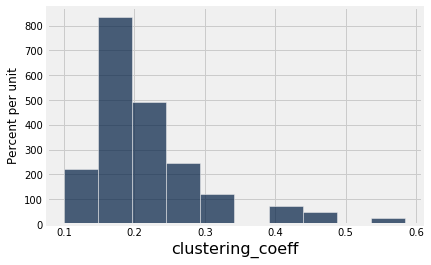

In [34]:
add_health_df.hist('clustering_coeff')

# Hand-writing questions

This part of questions does not require you code anything. Please just provide your answers.

## Adjacency Matrices and edge Lists

Consider the undirected graph as shown in the figure below.
<img src="Graph1.png" width="360" height="240" align="center"/>

**Question 7**
<ol>
<li>Write down the adjacency matrix for this graph.</li>
<li>Write down the edge list for this graph.</li>
<li>Which representation is better for this graph and why?</li>
</ol>

<!--
BEGIN QUESTION
name: q7
points: 6
manual: True
-->
<!-- EXPORT TO PDF -->

In [35]:
...
# Don't forget to make all your answers comment (begin each line with #)
# 1. adjacency matrix      
#     a b c d e f g h 
#   a 0 0 1 0 0 0 0 0 
#   b 0 0 1 1 0 0 0 0
#   c 1 1 0 1 0 0 0 0 
#   d 0 1 1 0 0 0 0 0 
#   e 0 0 0 0 0 1 1 0 
#   f 0 0 0 0 1 0 0 0
#   g 0 0 0 0 1 0 0 0
#   h 0 0 0 0 0 0 0 0
...

# 2. edge list
# [(a, c), (b, c), (b, d), (c, d), (e, f), (e, g), ]
...

# 3. Which representation is better for this graph and why?
# I think that the two methods of expressing graphs have their own strengths and weaknesses.
# In this situation, I perfer the adjacent matrix.
# Though edge list may using much less space than the adjacency matrix, but this way of expressing 
# the graph structure is not intuitive enough. Because this graph is quite small. So So we choose a 
# way to represent our graph structure and analyze the information in the graph without considering
# the storage space factor, as full, convenient, and intuitive as possible.
# But when graph size becoming bigger and bigger, It's not a good choice to use adjacent matrix.
...


Ellipsis

## Strong and weak ties

**Question 8** In the social network depicted in the following figure, with each edge labeled as either a strong or weak tie, which nodes satisfy the Strong Triadic Closure Property, and which do not? Provide an explanation for your answer.

<img src="3_22.png" width="360" height="240" align="center"/>
<br>

<!--
BEGIN QUESTION
name: q8
points: 4
manual: True
-->
<!-- EXPORT TO PDF -->

In [36]:
# 1. Which nodes # Provide your answers as comments

#         A, B, D satisfy the Strong Triadic Closure Property, while C, E do not.

# 2. Why

#         C has strong tie to both B & E, but there is no connection between B & E.
#         E has strong tie to both C & D, but there is no connection between C & D.
#        so C, E do not satisfy the Strong Triadic Closure Property.
#         A has only strong ties with B & D, and there is a connection between with B & D 
#         B has only strong ties with A & C, and there is a connection between with A & C
#         D has only strong ties with A & E, and there is a connection between with A & E
#        so A, B, D satisfy the Strong Triadic Closure Property.

### Rerun the tests and submit your lab

In [37]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

In order to submit your assignment, run the next cell.

You can submit as many times as you want (up to the deadline: 11:59PM, July 25th).

In [38]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw02.ipynb', 'hw02.pdf')
ok.submit()

Generating PDF...
Saved hw02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw02.ipynb'.
Submit... 100% complete
Submission successful for user: ziqiyuan123@berkeley.edu
URL: https://okpy.org/cal/demog180/su19/hw02/submissions/vlMGwr

